In [1]:
cd /Users/akshitasingh/Downloads/273A_ML/1_MLProject

/Users/akshitasingh/Downloads/273A_ML/1_MLProject


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(0)

from collections import defaultdict

np.random.seed(100)

In [3]:
# sklearn imports
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# other stats/math imports
import math
from scipy.stats import chi2_contingency

In [4]:
train_data = pd.read_csv("/Users/akshitasingh/Downloads/273A_ML/1_MLProject/dataset_diabetes/train_data.csv", delimiter=None) 
test_data = pd.read_csv("/Users/akshitasingh/Downloads/273A_ML/1_MLProject/dataset_diabetes/test_data.csv", delimiter=None) 

train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

train_data = train_data.drop(['Unnamed: 0'], axis = 1)
test_data = test_data.drop(['Unnamed: 0'], axis = 1)

Xtr = train_data.iloc[:, :-1]
Ytr = train_data.iloc[:, -1]

Xte = test_data.iloc[:, :-1]
Yte = test_data.iloc[:, -1]

## Model 4: Neural Networks

In [5]:
pipe = Pipeline([
        ('model', MLPClassifier(random_state= 100))
    ])

# alpha = [.01, .1, .15, .2, .3, .5]
alpha =  [.1, .2, .5]
hidden_layers = [(30, 10), (20, 20, 20), (20, 20, 15)]
lr = ["constant", "invscaling", "adaptive"]
act_f = ["relu", "tanh"]
scoring = ['recall', 'accuracy']

param_grid={
'model__learning_rate': lr,
'model__hidden_layer_sizes': hidden_layers ,
'model__alpha': alpha, 
'model__activation': act_f
}

# scoring = ['balanced_accuracy', 'accuracy', 'roc_auc', 'recall', 'precision']

grid = GridSearchCV(pipe, param_grid, cv=3, verbose=5, refit= True, return_train_score=True)
chosen_model = grid.fit(Xtr, Ytr)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(30, 10), model__learning_rate=constant;, score=(train=0.714, test=0.607) total time=  23.5s
[CV 2/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(30, 10), model__learning_rate=constant;, score=(train=0.708, test=0.617) total time=  19.8s
[CV 3/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(30, 10), model__learning_rate=constant;, score=(train=0.706, test=0.620) total time=  23.1s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(30, 10), model__learning_rate=invscaling;, score=(train=0.714, test=0.607) total time=  27.1s
[CV 2/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(30, 10), model__learning_rate=invscaling;, score=(train=0.708, test=0.617) total time=  21.1s
[CV 3/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(30, 10), model__learning_rate=invscaling;, score=(train=0.706, test=0.620) total time=  26.7s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(30, 10), model__learning_rate=adaptive;, score=(train=0.714, test=0.607) total time=  29.1s
[CV 2/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(30, 10), model__learning_rate=adaptive;, score=(train=0.708, test=0.617) total time=  25.5s
[CV 3/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(30, 10), model__learning_rate=adaptive;, score=(train=0.706, test=0.620) total time=  18.9s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 20), model__learning_rate=constant;, score=(train=0.711, test=0.610) total time=  24.0s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 20), model__learning_rate=constant;, score=(train=0.705, test=0.620) total time=  24.2s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 20), model__learning_rate=constant;, score=(train=0.705, test=0.620) total time=  24.4s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 20), model__learning_rate=invscaling;, score=(train=0.711, test=0.610) total time=  24.1s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 20), model__learning_rate=invscaling;, score=(train=0.705, test=0.620) total time=  24.5s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 20), model__learning_rate=invscaling;, score=(train=0.705, test=0.620) total time=  26.4s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 20), model__learning_rate=adaptive;, score=(train=0.711, test=0.610) total time=  26.0s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 20), model__learning_rate=adaptive;, score=(train=0.705, test=0.620) total time=  22.7s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 20), model__learning_rate=adaptive;, score=(train=0.705, test=0.620) total time=  19.5s
[CV 1/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=constant;, score=(train=0.711, test=0.607) total time=  18.5s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=constant;, score=(train=0.698, test=0.622) total time=  23.6s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=constant;, score=(train=0.697, test=0.625) total time=  25.9s
[CV 1/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=invscaling;, score=(train=0.711, test=0.607) total time=  21.8s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=invscaling;, score=(train=0.698, test=0.622) total time=  20.0s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=invscaling;, score=(train=0.697, test=0.625) total time=  20.4s
[CV 1/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=adaptive;, score=(train=0.711, test=0.607) total time=  20.4s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=adaptive;, score=(train=0.698, test=0.622) total time=  21.8s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__activation=relu, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=adaptive;, score=(train=0.697, test=0.625) total time=  21.0s
[CV 1/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(30, 10), model__learning_rate=constant;, score=(train=0.693, test=0.614) total time=  11.4s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(30, 10), model__learning_rate=constant;, score=(train=0.699, test=0.617) total time=  16.6s
[CV 3/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(30, 10), model__learning_rate=constant;, score=(train=0.693, test=0.627) total time=  13.0s
[CV 1/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(30, 10), model__learning_rate=invscaling;, score=(train=0.693, test=0.614) total time=   9.9s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(30, 10), model__learning_rate=invscaling;, score=(train=0.699, test=0.617) total time=  10.9s
[CV 3/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(30, 10), model__learning_rate=invscaling;, score=(train=0.693, test=0.627) total time=   9.2s
[CV 1/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(30, 10), model__learning_rate=adaptive;, score=(train=0.693, test=0.614) total time=   7.5s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(30, 10), model__learning_rate=adaptive;, score=(train=0.699, test=0.617) total time=  10.8s
[CV 3/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(30, 10), model__learning_rate=adaptive;, score=(train=0.693, test=0.627) total time=   9.9s
[CV 1/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 20), model__learning_rate=constant;, score=(train=0.699, test=0.620) total time=  13.2s
[CV 2/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 20), model__learning_rate=constant;, score=(train=0.698, test=0.621) total time=  12.6s
[CV 3/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 20), model__learning_rate=constant;, score=(train=0.686, test=0.626) total time=  11.1s
[CV 1/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 20), model__learning_rate=in

/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=constant;, score=(train=0.696, test=0.613) total time=  14.2s
[CV 2/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=constant;, score=(train=0.687, test=0.631) total time=  10.9s
[CV 3/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=constant;, score=(train=0.674, test=0.637) total time=   9.7s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=invscaling;, score=(train=0.696, test=0.613) total time=  14.5s
[CV 2/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=invscaling;, score=(train=0.687, test=0.631) total time=  11.0s
[CV 3/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=invscaling;, score=(train=0.674, test=0.637) total time=   9.4s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=adaptive;, score=(train=0.696, test=0.613) total time=  14.3s
[CV 2/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=adaptive;, score=(train=0.687, test=0.631) total time=  10.5s
[CV 3/3] END model__activation=relu, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=adaptive;, score=(train=0.674, test=0.637) total time=   9.9s
[CV 1/3] END model__activation=relu, model__alpha=0.5, model__hidden_layer_sizes=(30, 10), model__learning_rate=constant;, score=(train=0.674, test=0.630) total time=   8.0s
[CV 2/3] END model__activation=relu, model__alpha=0.5, model__hidden_layer_sizes=(30, 10), model__learning_rate=constant;, score=(train=0.666, test=0.632) total time=   5.0s
[CV 3/3] END model__activation=relu, model__alpha=0.5, model__hidden_layer_sizes=(30, 10), model__learning_rate=consta

/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(30, 10), model__learning_rate=constant;, score=(train=0.686, test=0.615) total time=  14.5s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(30, 10), model__learning_rate=constant;, score=(train=0.681, test=0.620) total time=  13.5s
[CV 3/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(30, 10), model__learning_rate=constant;, score=(train=0.679, test=0.627) total time=  13.0s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(30, 10), model__learning_rate=invscaling;, score=(train=0.686, test=0.615) total time=  13.1s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(30, 10), model__learning_rate=invscaling;, score=(train=0.681, test=0.620) total time=  12.9s
[CV 3/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(30, 10), model__learning_rate=invscaling;, score=(train=0.679, test=0.627) total time=  14.7s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(30, 10), model__learning_rate=adaptive;, score=(train=0.686, test=0.615) total time=  13.8s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(30, 10), model__learning_rate=adaptive;, score=(train=0.681, test=0.620) total time=  14.6s
[CV 3/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(30, 10), model__learning_rate=adaptive;, score=(train=0.679, test=0.627) total time=  13.9s
[CV 1/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 20), model__learning_rate=constant;, score=(train=0.674, test=0.628) total time=  12.7s
[CV 2/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 20), model__learning_rate=constant;, score=(train=0.655, test=0.621) total time=  11.2s
[CV 3/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 20), model__learning_rate=constant;, score=(train=0.661, test=0.631) total time=   8.8s
[CV 1/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 20), model__learning_rate=in

/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=constant;, score=(train=0.673, test=0.627) total time=  19.8s
[CV 1/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=invscaling;, score=(train=0.677, test=0.620) total time=  17.3s
[CV 2/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=invscaling;, score=(train=0.681, test=0.627) total time=  18.2s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=invscaling;, score=(train=0.673, test=0.627) total time=  20.3s
[CV 1/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=adaptive;, score=(train=0.677, test=0.620) total time=  17.4s
[CV 2/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=adaptive;, score=(train=0.681, test=0.627) total time=  17.5s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__activation=tanh, model__alpha=0.1, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=adaptive;, score=(train=0.673, test=0.627) total time=  18.8s
[CV 1/3] END model__activation=tanh, model__alpha=0.2, model__hidden_layer_sizes=(30, 10), model__learning_rate=constant;, score=(train=0.669, test=0.625) total time=  11.8s
[CV 2/3] END model__activation=tanh, model__alpha=0.2, model__hidden_layer_sizes=(30, 10), model__learning_rate=constant;, score=(train=0.664, test=0.632) total time=  14.6s
[CV 3/3] END model__activation=tanh, model__alpha=0.2, model__hidden_layer_sizes=(30, 10), model__learning_rate=constant;, score=(train=0.664, test=0.639) total time=  17.7s
[CV 1/3] END model__activation=tanh, model__alpha=0.2, model__hidden_layer_sizes=(30, 10), model__learning_rate=invscaling;, score=(train=0.669, test=0.625) total time=  13.4s
[CV 2/3] END model__activation=tanh, model__alpha=0.2, model__hidden_layer_sizes=(30, 10), model__learning_rate=invscaling;,

/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__activation=tanh, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=constant;, score=(train=0.665, test=0.626) total time=  18.1s
[CV 2/3] END model__activation=tanh, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=constant;, score=(train=0.665, test=0.634) total time=  13.0s
[CV 3/3] END model__activation=tanh, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=constant;, score=(train=0.657, test=0.643) total time=  12.5s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__activation=tanh, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=invscaling;, score=(train=0.665, test=0.626) total time=  18.0s
[CV 2/3] END model__activation=tanh, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=invscaling;, score=(train=0.665, test=0.634) total time=  12.8s
[CV 3/3] END model__activation=tanh, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=invscaling;, score=(train=0.657, test=0.643) total time=  12.6s


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__activation=tanh, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=adaptive;, score=(train=0.665, test=0.626) total time=  18.4s
[CV 2/3] END model__activation=tanh, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=adaptive;, score=(train=0.665, test=0.634) total time=  12.8s
[CV 3/3] END model__activation=tanh, model__alpha=0.2, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=adaptive;, score=(train=0.657, test=0.643) total time=  12.4s
[CV 1/3] END model__activation=tanh, model__alpha=0.5, model__hidden_layer_sizes=(30, 10), model__learning_rate=constant;, score=(train=0.646, test=0.633) total time=   5.9s
[CV 2/3] END model__activation=tanh, model__alpha=0.5, model__hidden_layer_sizes=(30, 10), model__learning_rate=constant;, score=(train=0.645, test=0.632) total time=   5.5s
[CV 3/3] END model__activation=tanh, model__alpha=0.5, model__hidden_layer_sizes=(30, 10), model__learning_rate=consta

In [6]:
chosen_model.best_params_

{'model__activation': 'tanh',
 'model__alpha': 0.5,
 'model__hidden_layer_sizes': (30, 10),
 'model__learning_rate': 'constant'}

In [7]:
clf_tanh = MLPClassifier(alpha= .5, hidden_layer_sizes=(20, 20, 15), random_state=100,
              solver='lbfgs', learning_rate = 'constant', activation = 'tanh').fit(Xtr, Ytr)
clf_relu = MLPClassifier(alpha= .5, hidden_layer_sizes=(20, 20, 15), random_state=100,
              solver='lbfgs', learning_rate = 'constant', activation = 'relu').fit(Xtr, Ytr)

/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


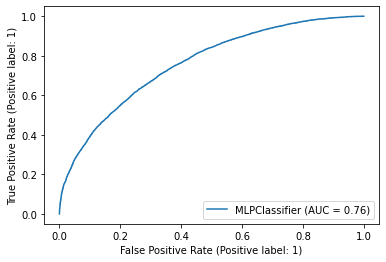

In [8]:
metrics.plot_roc_curve(clf_tanh.fit(Xtr, Ytr), Xtr, Ytr) 

/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


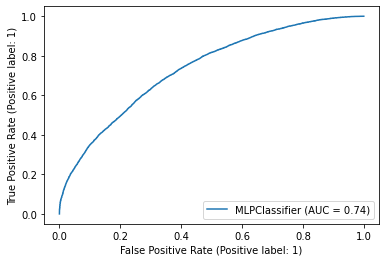

In [9]:
metrics.plot_roc_curve(clf_relu.fit(Xtr, Ytr), Xtr, Ytr) 

In [10]:
cross_val_score(clf_tanh, Xtr, Ytr, cv = 4).mean()

/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lb

0.6081644643829832

In [11]:
cross_val_score(clf_tanh, Xtr, Ytr, cv = 4).var()

/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lb

2.206580279342712e-07

In [12]:
cross_val_score(clf_relu, Xtr, Ytr, cv = 4).mean()

/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lb

0.6192149367301303

In [13]:
cross_val_score(clf_relu, Xtr, Ytr, cv = 4).var()

/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lb

9.32505635909886e-05

In [17]:
# grid_YteH = grid.predict(Xte)
# print(confusion_matrix(Yte, grid_YteH))
# print(classification_report(Yte, grid_YteH))